In [5]:
import numpy as np
from qiskit import *
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.tools.visualization import plot_histogram

from qiskit.providers.aqt import AQT
aqt = AQT.enable_account('2633b2d14dae4d9da7c9df2503857334')

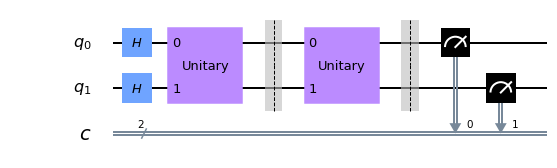

In [6]:
c = QuantumCircuit(2,2)
c.h(0)
c.h(1)
Grov = Operator([[-1, 0,  0, 0], 
                 [0, 1,  0, 0], 
                 [0, 0, 1, 0], 
                 [0, 0,  0, 1]])
c.append(Grov,[0,1])
c.barrier()
MeanInv = Operator([[-1/2,  1/2,  1/2,  1/2], 
                    [ 1/2, -1/2,  1/2,  1/2], 
                    [ 1/2,  1/2, -1/2,  1/2], 
                    [ 1/2,  1/2,  1/2, -1/2]])
c.append(MeanInv,[0,1])
c.barrier()
c.measure([0,1],[0,1])
c.draw(output='mpl')

In [7]:
ideal = aqt.get_backend('aqt_qasm_simulator')
noise = aqt.get_backend('aqt_qasm_simulator_noise_1')

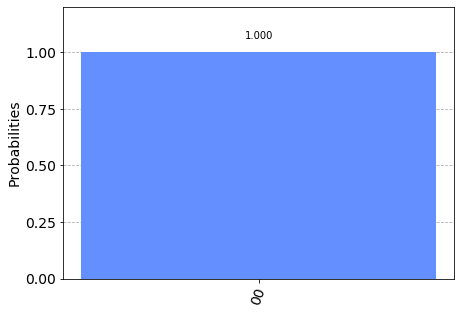

In [8]:
res_ideal = qiskit.execute(c, ideal, shots=200).result()
plot_histogram(res_ideal.get_counts(c))

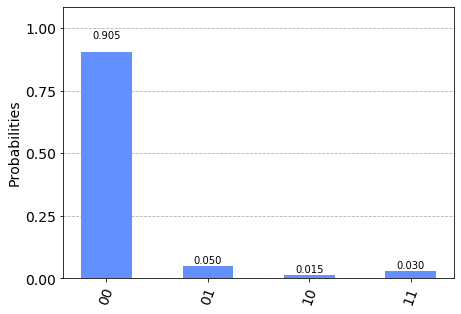

In [9]:
res_noise = qiskit.execute(c, noise, shots=200).result()
plot_histogram(res_noise.get_counts(c))